# Skript: Pieplot, Heatmap, Pairplot


---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL.ImagePalette import wedge
from matplotlib import color_sequences

In [2]:
# Colormaps anschauen:
cmaps = plt.colormaps()
print(cmaps)

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 't

In [99]:
sns.color_palette("magma_r")

[(0.997341, 0.733545, 0.505167),
 (0.973381, 0.46152, 0.361965),
 (0.828886, 0.262229, 0.430644),
 (0.594508, 0.175701, 0.501241),
 (0.372116, 0.092816, 0.499053),
 (0.135053, 0.068391, 0.315)]

In [4]:
# Farbpalette festlegen
sns.set_palette("colorblind")

# 1. Pieplot

---
 
Pieplots / Piecharts, zu Deutsch Tortendiagramme, Kuchendiagramme oder Kreisdiagramme, eignen sich zur **Darstellung von Anteilen einzelner Kategorien/Klassen an einer Gesamtheit**.

* Beispiel: Männlich/weiblich, die drei versch. Pinguin-Arten
* Wichtig: Nur möglichst wenige Kategorien/"Kuchenstücke" verwenden


**Ziel:** Anteile Entdeckungsmethoden im Planeten Datensatz als Kuchendiagramm darstellen

In [5]:
# Datensatz
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [6]:
# Wie viele Entdeckungsmethoden?
planets["method"].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [7]:
# Welche am häufigsten?
planets["method"].value_counts()

method
Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: count, dtype: int64

In [8]:
# Daten reduzieren auf wichtigste Kategorien
planets_reduced = planets["method"].value_counts()[:2]
planets_reduced

method
Radial Velocity    553
Transit            397
Name: count, dtype: int64

In [9]:
# "Other" Kategorie erstellen
other_sum = planets["method"].value_counts()[2:].sum()
other_series = pd.Series({"Other": other_sum}, name='count')
other_series

Other    85
Name: count, dtype: int64

In [10]:
# Zusammengefasster Datensatz
planets_edit = pd.concat([planets_reduced, other_series],
						 axis=0)
planets_edit

Radial Velocity    553
Transit            397
Other               85
Name: count, dtype: int64

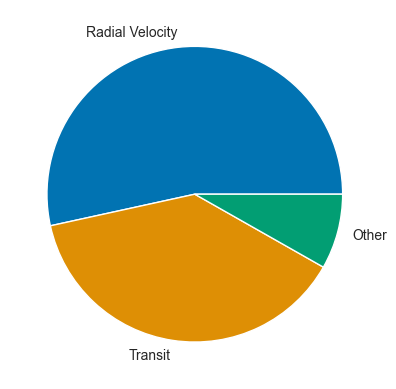

In [11]:
# Einfacher Pieplot
plt.pie(planets_edit,
		labels=planets_edit.index);

Sieht noch nicht so schick aus.
Wir brauchen folgendes:
- Wir wollen den Plot noch drehen können!
- Dateninformationen
- Lieber eine Legende?
- Titel und anderer Schnickschnack?


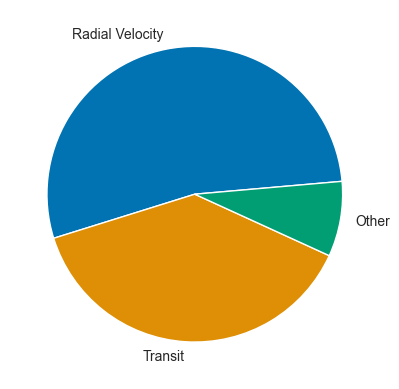

In [15]:
# Drehen mit startangle von 0 bis 360 Grad:
plt.pie(planets_edit,
		labels=planets_edit.index,
		startangle=5);

## Kuchenscheiben austrennen

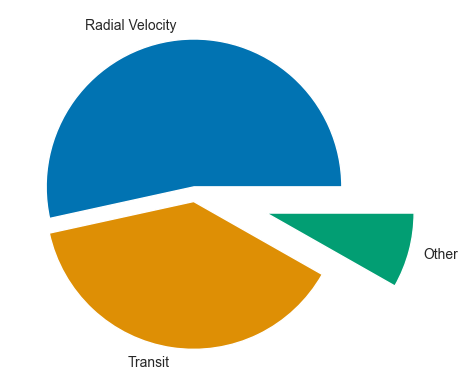

In [16]:
# Mit explode
plt.pie(planets_edit,
		labels=planets_edit.index,
		explode=[0.05, 0.05, 0.5]);

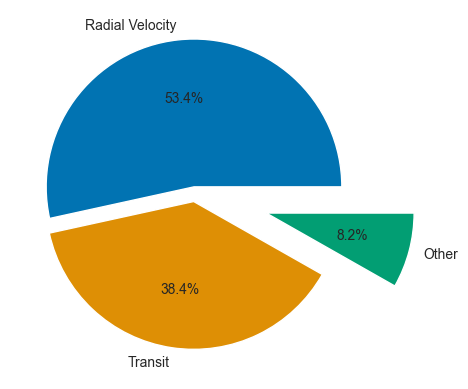

In [17]:
# Anteile anzeigen
plt.pie(planets_edit,
		labels=planets_edit.index,
		explode=[0.05, 0.05, 0.5],
		autopct="%.1f%%");

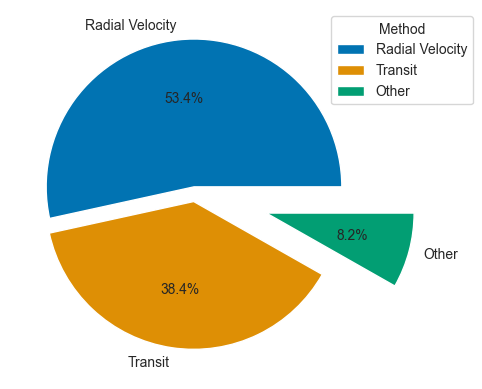

In [18]:
# Legende und Titel
plt.pie(planets_edit,
		labels=planets_edit.index,
		explode=[0.05, 0.05, 0.5],
		autopct="%.1f%%")

plt.legend(title="Method",
		   bbox_to_anchor=(0.85, 1));

## Donut Plots und verschachtelte Pie Charts

In [19]:
# Titanic: Passagierklassen nach Alterskategorien
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [20]:
# Nach Passagierklassen gruppieren
class_group = titanic.groupby("class", observed=True) \
	.size() \
	.rename('count')

class_group

class
First     216
Second    184
Third     491
Name: count, dtype: int64

In [21]:
# Nach Passagierklasse und Personenzustand gruppieren
multiple_group = titanic.groupby(["class", "who"], observed=True) \
	.size() \
	.reset_index(name="count")

multiple_group

,class,who,count
0,First,child,6
1,First,man,119
2,First,woman,91
3,Second,child,19
4,Second,man,99
5,Second,woman,66
6,Third,child,58
7,Third,man,319
8,Third,woman,114


In [22]:
# Klassenbezeichnungen extrahieren
classes_list = list(class_group.index)
classes_list

['First', 'Second', 'Third']

In [23]:
# Personenbezeichnungen extrahieren
who_list = list(multiple_group["who"].unique())
who_list

['child', 'man', 'woman']

In [1]:
# Farbpalette: tab20c
# tab20c findet sich hier: 
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
sns.color_palette("tab20c")

NameError: name 'sns' is not defined

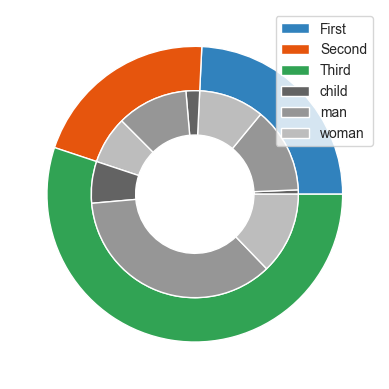

In [25]:
cmap = color_sequences["tab20c"]
fig, ax = plt.subplots()
size = 0.3

ax.pie(class_group,
	   wedgeprops={"width": size},
	   colors=cmap[0::4])

ax.pie(multiple_group["count"],
	   radius=1 - size,
	   wedgeprops={"width": size},
	   colors=cmap[16:19])

tags_list = classes_list + who_list
plt.legend(labels=tags_list);

# Übungsaufgabe Pieplot

Lade den tips Datensatz und erstelle folgende Graphik:

![output.png](1_pieplot.png)
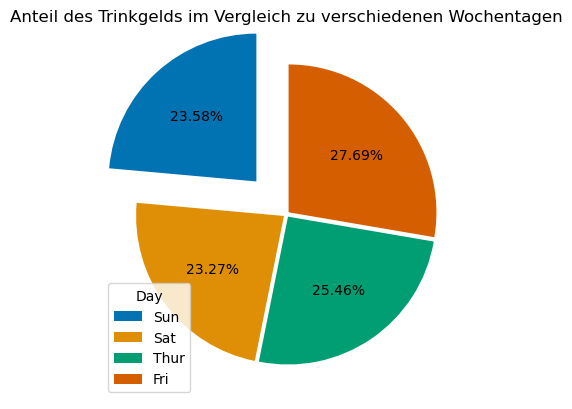

In [31]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


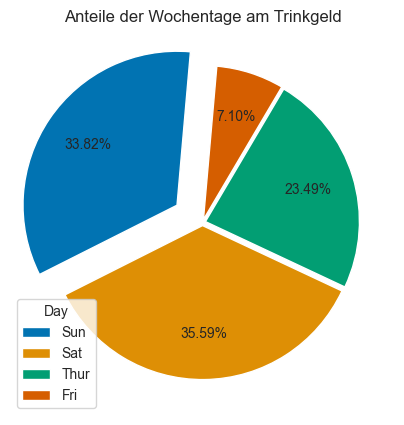

In [67]:
# Size
plt.figure(figsize=(5, 5))

# Slicing
tip_per_day = tips.groupby("day", as_index=False, observed=False)["tip"].sum()

# Order & Re-Indexing
order = ["Sun", "Sat", "Thur", "Fri"]
tip_per_day = tip_per_day.set_index("day").reindex(order).reset_index()

# Pie plot
wedges, texts, autotexts = plt.pie(
	tip_per_day["tip"],
	labels=None,
	autopct="%.2f%%",
	startangle=85,
	pctdistance=0.7,
	wedgeprops={"edgecolor": "white"},
	explode=[0.2, 0.02, 0.02, 0.02]
)

# title
plt.title("Anteile der Wochentage am Trinkgeld")

# legend
plt.legend(
	wedges,
	tip_per_day["day"],
	title="Day",
	loc="lower left"
);


# 2. Heatmaps

---

Dokumentation: https://seaborn.pydata.org/generated/seaborn.heatmap.html

* Grafische Tabelle, wobei Zellen in Abhängigkeit der Höhe ihrer Werte eingefärbt werden
* Die Einfärbung erfolgt anhand eines Farbverlaufs (sequentielle Farbpalette)
* Gängig bei Korrelationen (farbliche Korrelationsmatrix), aber auch für andere Darstellungen geeignet

Zur Vorbereitung von Daten für Heatmaps wird `pd.pivot_table` wieder interessant. Doku: https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [68]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [69]:
# Median des Preises nach Farbe und Schliffqualität
diamonds_pivot = diamonds.pivot_table(index="cut",
									  columns="color",
									  values="price",
									  aggfunc="median",
									  observed=False)

diamonds_pivot

color,D,E,F,G,H,I,J
cut,,,,,,,
Ideal,1576.0,1437.0,1775.0,1857.5,2278.0,2659.0,4096.0
Premium,2009.0,1928.0,2841.0,2745.0,4511.0,4640.0,5063.0
Very Good,2310.0,1989.5,2471.0,2437.0,3734.0,3888.0,4113.0
Good,2728.5,2420.0,2647.0,3340.0,3468.5,3639.5,3733.0
Fair,3730.0,2956.0,3035.0,3057.0,3816.0,3246.0,3302.0


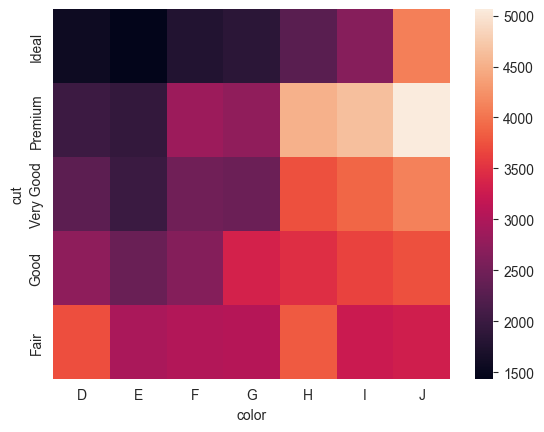

In [70]:
# Einfache Heatmap
sns.heatmap(diamonds_pivot);

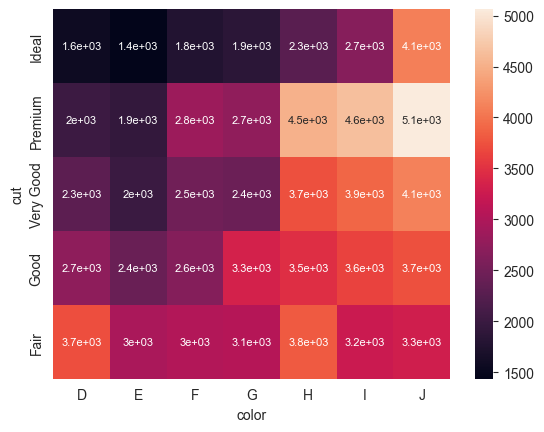

In [71]:
# Annotationen
sns.heatmap(diamonds_pivot,
			annot=True,
			annot_kws={"fontsize": 8});

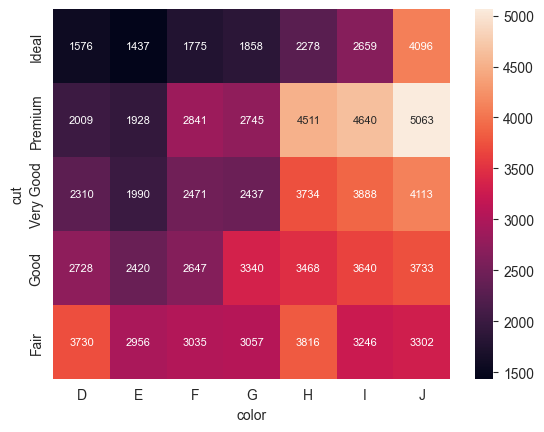

In [72]:
# Mit Formatcode lassen sich Zahlen besser darstellen.
# Video: https://www.youtube.com/watch?v=ry2gMuC9mw0
sns.heatmap(diamonds_pivot,
			annot=True,
			annot_kws={"fontsize": 8},
			fmt=".0f");

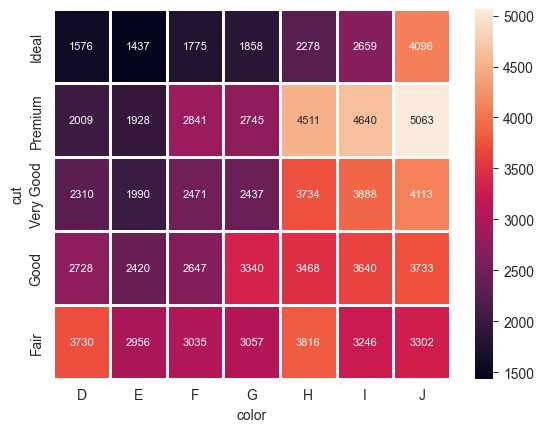

In [73]:
sns.heatmap(diamonds_pivot,
			annot=True,
			annot_kws={"fontsize": 8},
			fmt=".0f",
			lw=1);

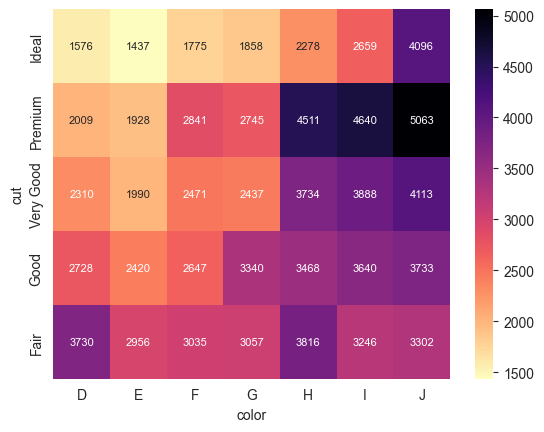

In [74]:
# Farbpalette ändern
# Umdrehen von Farbpaletten mit Anhängen von "_r" möglich:
sns.heatmap(diamonds_pivot,
			annot=True,
			annot_kws={"fontsize": 8},
			fmt=".0f",
			cmap="magma_r");

### Übungsaufgabe Heatmap

Erstelle die folgende Grafik (Datensatz: `tips`):

![image.png](2_heatmap.png)
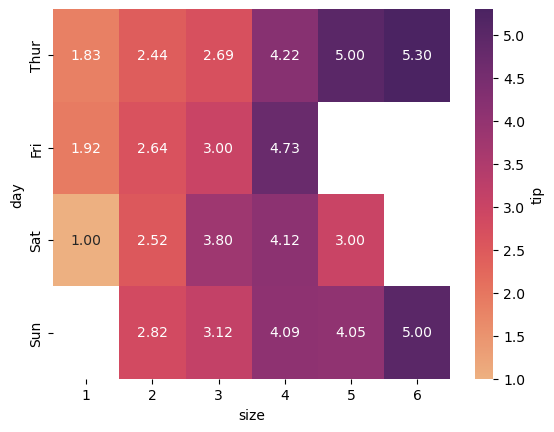

In [116]:
sns.color_palette("tab20c")

[(0.19215686274509805, 0.5098039215686274, 0.7411764705882353),
 (0.4196078431372549, 0.6823529411764706, 0.8392156862745098),
 (0.6196078431372549, 0.792156862745098, 0.8823529411764706),
 (0.7764705882352941, 0.8588235294117647, 0.9372549019607843),
 (0.9019607843137255, 0.3333333333333333, 0.050980392156862744),
 (0.9921568627450981, 0.5529411764705883, 0.23529411764705882),
 (0.9921568627450981, 0.6823529411764706, 0.4196078431372549),
 (0.9921568627450981, 0.8156862745098039, 0.6352941176470588),
 (0.19215686274509805, 0.6392156862745098, 0.32941176470588235),
 (0.4549019607843137, 0.7686274509803922, 0.4627450980392157),
 (0.6313725490196078, 0.8509803921568627, 0.6078431372549019),
 (0.7803921568627451, 0.9137254901960784, 0.7529411764705882),
 (0.4588235294117647, 0.4196078431372549, 0.6941176470588235),
 (0.6196078431372549, 0.6039215686274509, 0.7843137254901961),
 (0.7372549019607844, 0.7411764705882353, 0.8627450980392157),
 (0.8549019607843137, 0.8549019607843137, 0.9215686274509803),
 (0.38823529411764707, 0.38823529411764707, 0.38823529411764707),
 (0.5882352941176471, 0.5882352941176471, 0.5882352941176471),
 (0.7411764705882353, 0.7411764705882353, 0.7411764705882353),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627)]

In [81]:
tips_pivot = tips.pivot_table(
	index="day",
	columns="size",
	values="tip",
	aggfunc="mean",
	observed=False
)

tips_pivot

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


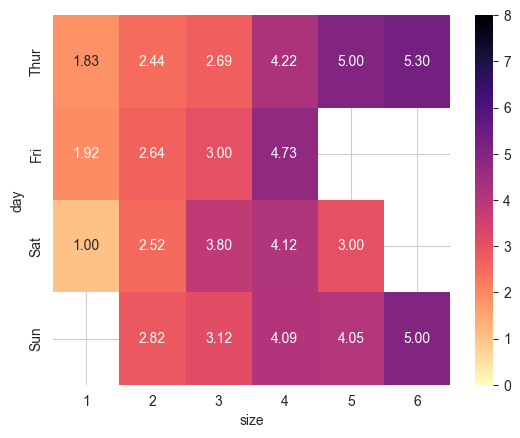

In [172]:
tips_heat = sns.heatmap(
	tips_pivot,
	annot=True,
	annot_kws={"fontsize": 10},
	fmt=".2f",
	cmap="magma_r",
	vmin=0,
	vmax=8
);



# Pairplot

Figure-level Plot-Funktion ähnlich wie `sns.relplot`. `relplot` stellt in Zeilen oder Spalten von Plots die einzelnen Kategorien einer Spalte dar, während `pairplot` Kombinationen von Variablen über Spalten und Zeilen darstellt.

* Paarweise Darstellung aller Kombinationen numerischer (!) Spalten eines Datensatzes
* Gewöhnlich als Scatterplots dargestellt mit Ausnahme der Diagonalen.
* In der Diagonalen finden sich Histogramme (oder KDE-Plots), die Auskunft über die Verteilung der Variablen geben 
* Link zur Doku: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [129]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


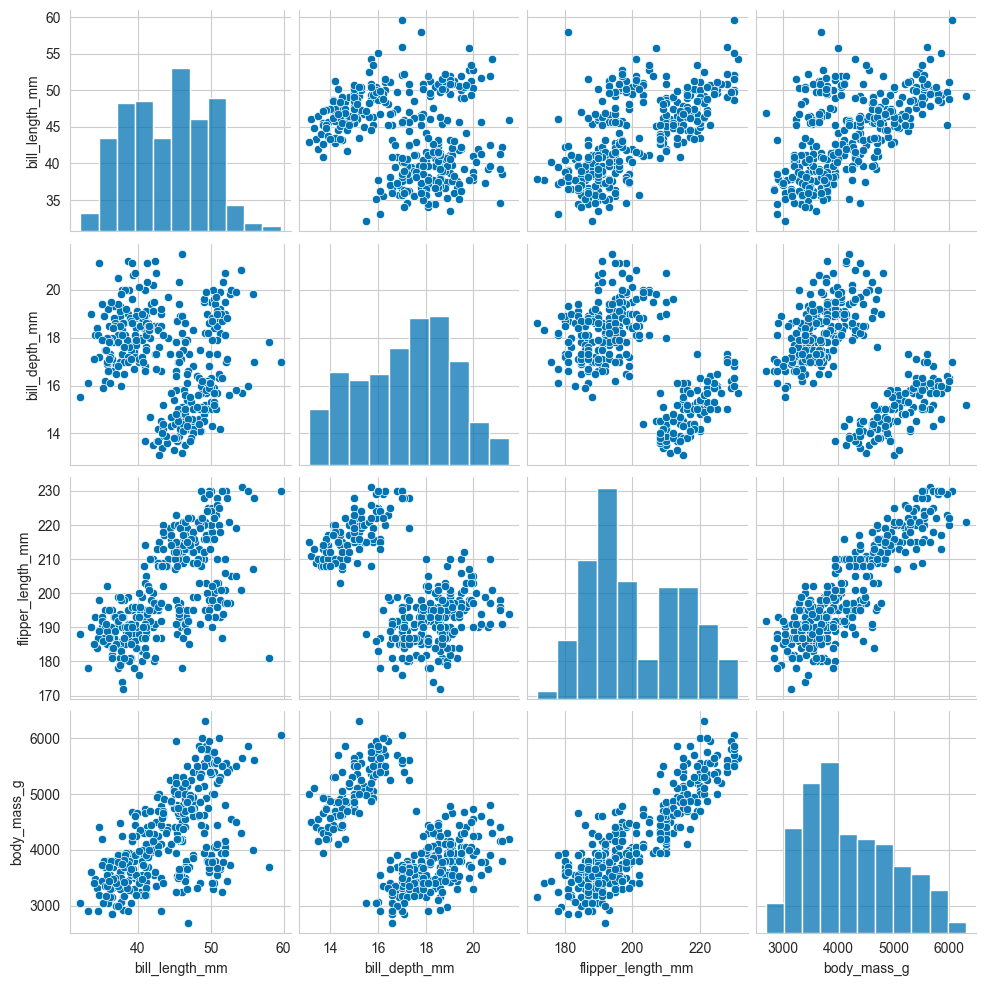

In [130]:
# Einfacher Pairplot
sns.pairplot(penguins);

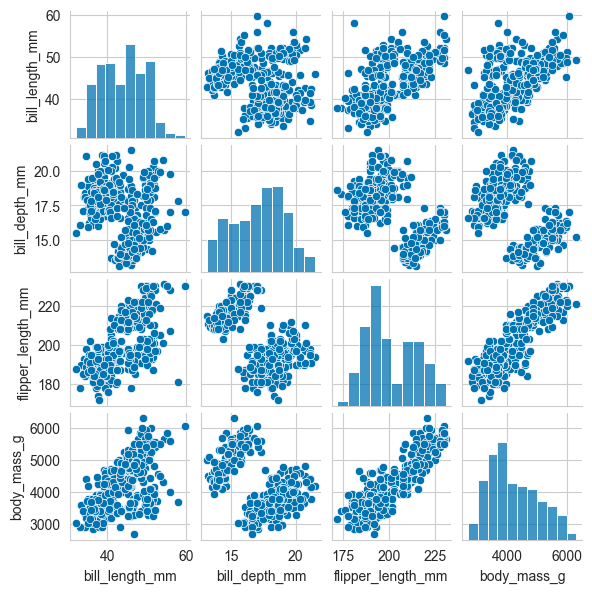

In [131]:
# Wenn's kleiner werden soll (height in Inchgröße jedes Subplots):
sns.pairplot(penguins, height=1.5);

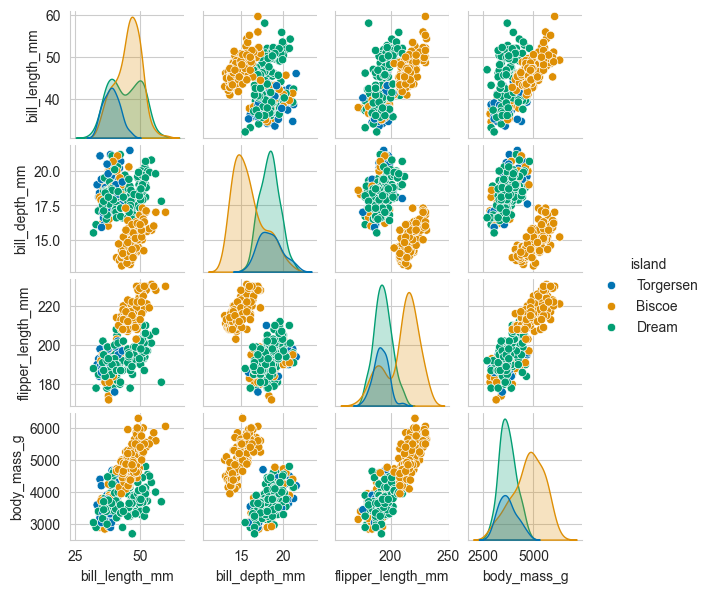

In [132]:
# Auch Gruppierung nach Farbe möglich
sns.pairplot(penguins,
			 hue="island",
			 height=1.5);

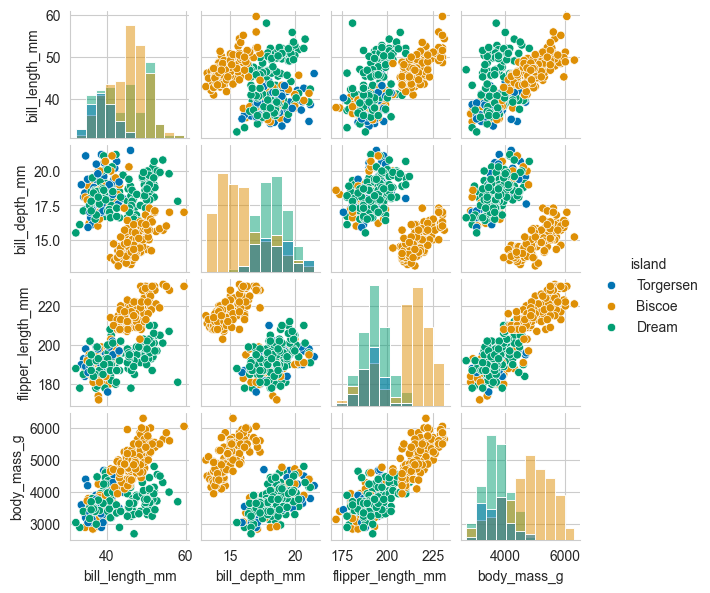

In [133]:
# Änderung der angezeigten Plot-Formen
# Histogramm in der Diagonalen
sns.pairplot(penguins,
			 hue="island",
			 diag_kind="hist",
			 height=1.5);

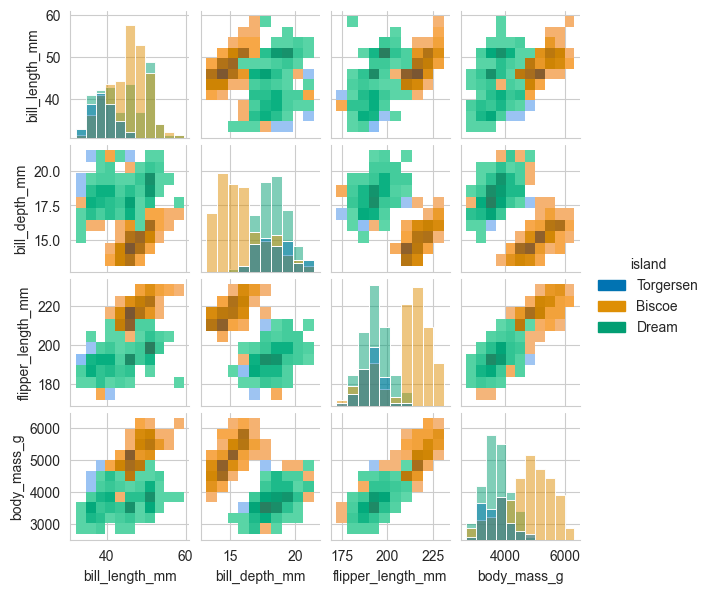

In [134]:
# 2D-Histogramme
sns.pairplot(penguins,
			 hue="island",
			 kind="hist",
			 height=1.5);

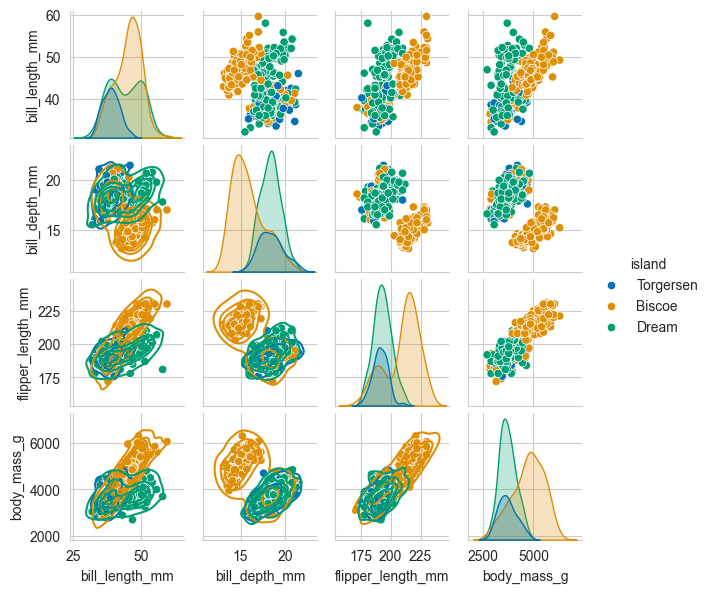

In [135]:
# KDE-Plot zu Datenpunkten hinzufügen
ax = sns.pairplot(penguins,
				  hue="island",
				  height=1.5)

ax.map_lower(sns.kdeplot, levels=5);

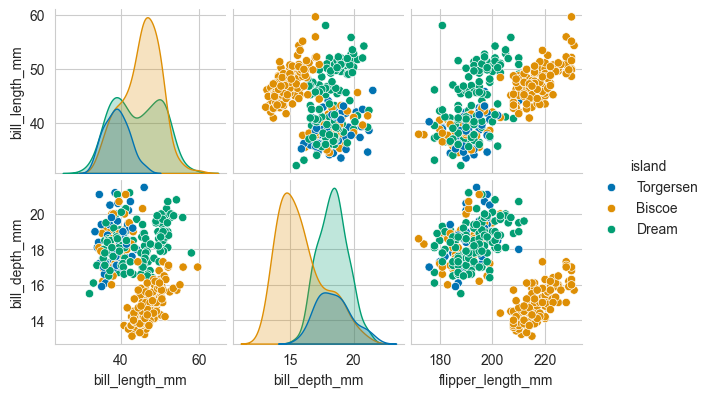

In [136]:
# Selektierung der Variablen
sns.pairplot(penguins,
			 hue="island",
			 x_vars=["bill_length_mm", "bill_depth_mm", "flipper_length_mm"],
			 y_vars=["bill_length_mm", "bill_depth_mm"],
			 height=2);

# Übungsaufgabe Pairplot

Erstelle die gezeigte Graphik (Datensatz `tips`):

![output.png](3_pairplot.png)
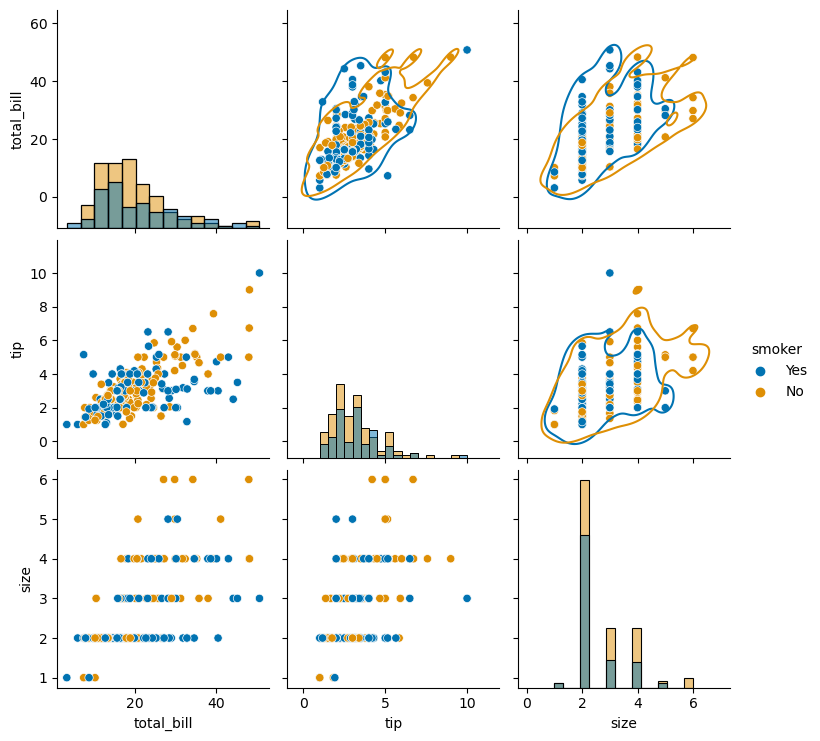

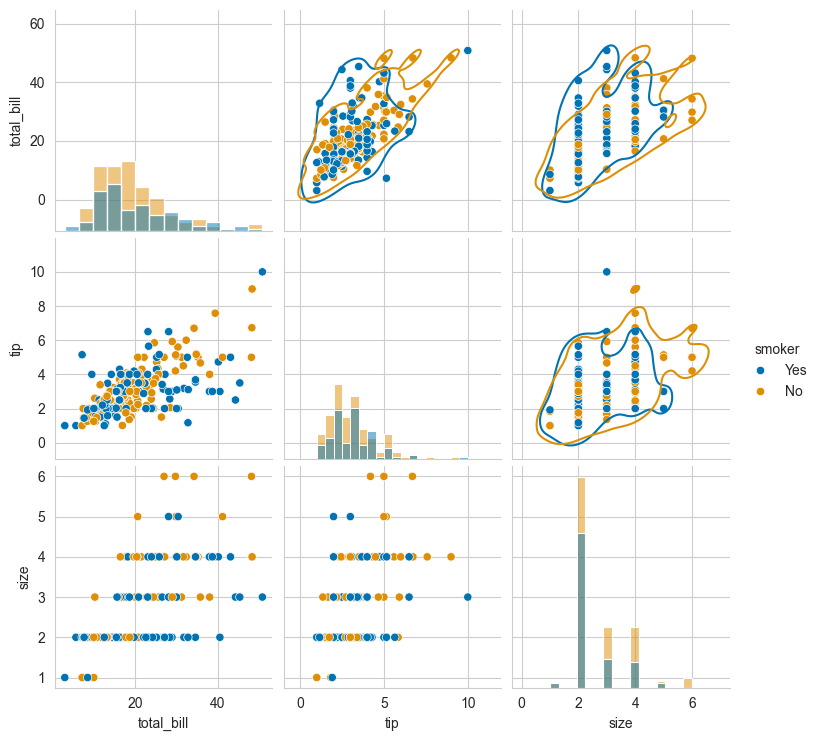

In [173]:
tips_pair_plot = sns.pairplot(
	tips,
	hue="smoker",
	diag_kind="hist",
)

tips_pair_plot.map_upper(sns.kdeplot, levels=2);